### Figure S17 of Grund & Ritter (2020) , GJI


This Jupyter Notebook is part of our GJI paper and reproduces the "raw map" shown in **Fig. S17** of the Supporting Information. Afterwards some modifications were made to the plot using Inkscape. 

Feel free to modify or play around with the different parameters!

Packages required on your system:

* PyGMT, still under development (see https://www.pygmt.org/dev/overview.html)
* pandas

author: M. Grund (2020-07-23)

In [1]:
import pygmt
import pandas as pd

In [2]:
# create figure object
fig = pygmt.Figure() 

In [3]:
# define parameters for plotting
pygmt.config(FONT_ANNOT_PRIMARY = '2p,Helvetica',
            FONT_LABEL = '4',
            MAP_LABEL_OFFSET = '2.5p',
            MAP_TICK_LENGTH_PRIMARY = '1p',
            PS_MEDIA ='A2',
            PROJ_LENGTH_UNIT = 'c',
            MAP_ANNOT_OFFSET_PRIMARY = '0.7p',
            MAP_ANNOT_OFFSET_SECONDARY = '1p',
            MAP_FRAME_TYPE = 'plain',
            MAP_FRAME_WIDTH = '0.2p',
            FORMAT_GEO_MAP = 'D',
            PS_CHAR_ENCODING = 'Standard+',
            MAP_FRAME_PEN = '0.2p,black',
            MAP_TICK_PEN_PRIMARY = '0.2p,black')  

In [4]:
# define region
lonlow = 5
lonupp = 15
latlow = 61
latupp = 66

regvals = [5, 15, 61, 66]
cmapo = 'topo.cpt'

# generate backgroud image based on grid
fig.grdimage('@earth_relief_01m', 
             region = regvals, 
             projection = 'm1:55000000', 
             cmap = cmapo)

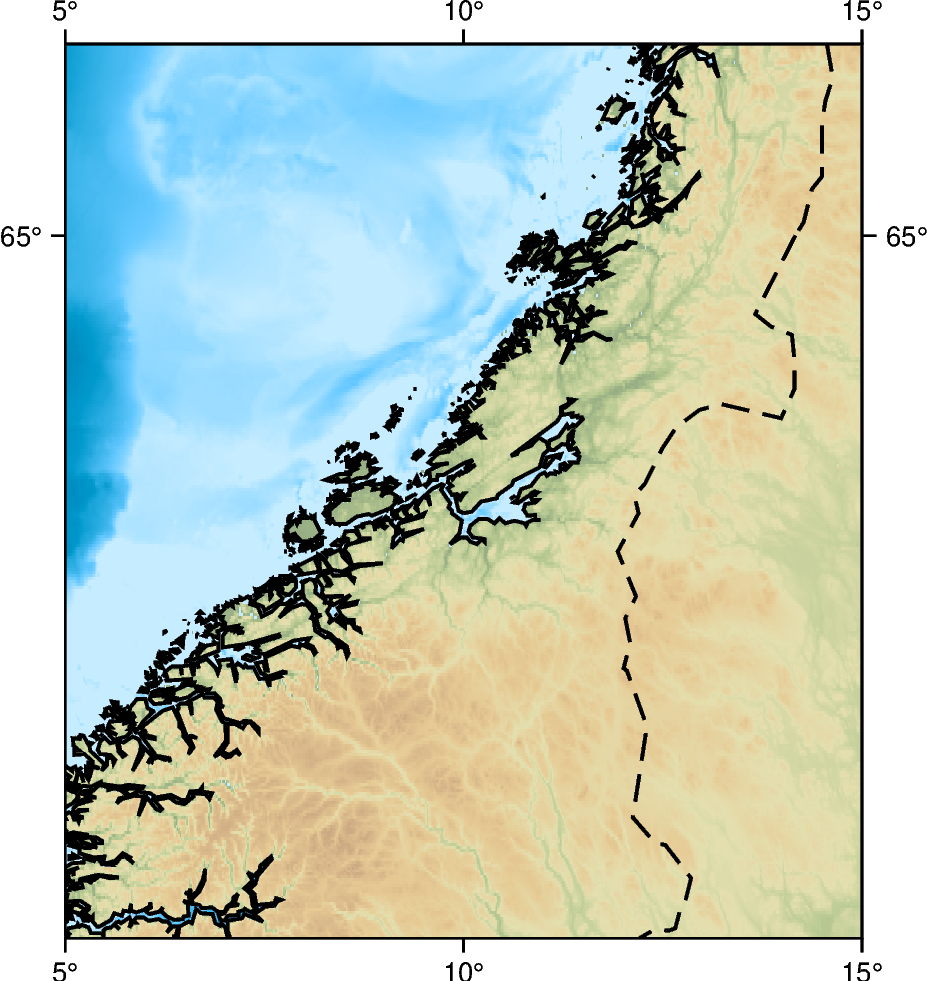

In [5]:
# plot shorelines, borders with an immediate resolution and add a frame.
fig.coast(resolution = 'i', 
          shorelines ='1/thinnest,black', 
          frame = ['x5', 'y5'],
          borders = '1/0.25p,-')

figdpi = 1000
fig.show(dpi = figdpi)

In [6]:
# read file with station data using pandas
filein = '00_ordfile_stereos.dat'
namescol = ['id','staname','lon', 'lat', 'filename', 'val1','val2','val3']
datatab = pd.read_table(filein, delim_whitespace = True, names = namescol)
datatab.head()

,id,staname,lon,lat,filename,val1,val2,val3
0,1,AAL,19.9936,60.1780,001_PLOT_RESULTS_stereo_AAL.eps,9,35,0
1,2,AKN,6.9974,62.1783,002_PLOT_RESULTS_stereo_AKN.eps,1,20,0
2,3,ARA0,25.5058,69.5349,003_PLOT_RESULTS_stereo_ARA0.eps,8,19,0
3,4,ARBE,25.9841,59.4365,004_PLOT_RESULTS_stereo_ARBE.eps,2,4,0
4,5,ARE0,25.5057,69.5349,005_PLOT_RESULTS_stereo_ARE0.eps,28,61,0


In [7]:
# filter stations (use only locations within regions limits defined above)
datatab = datatab[(datatab['lon'] >= lonlow) & (datatab['lon'] <= lonupp) & (datatab['lat'] >= latlow)
                  & (datatab['lat'] <= latupp)]

# reset the index
datatab = datatab.reset_index()

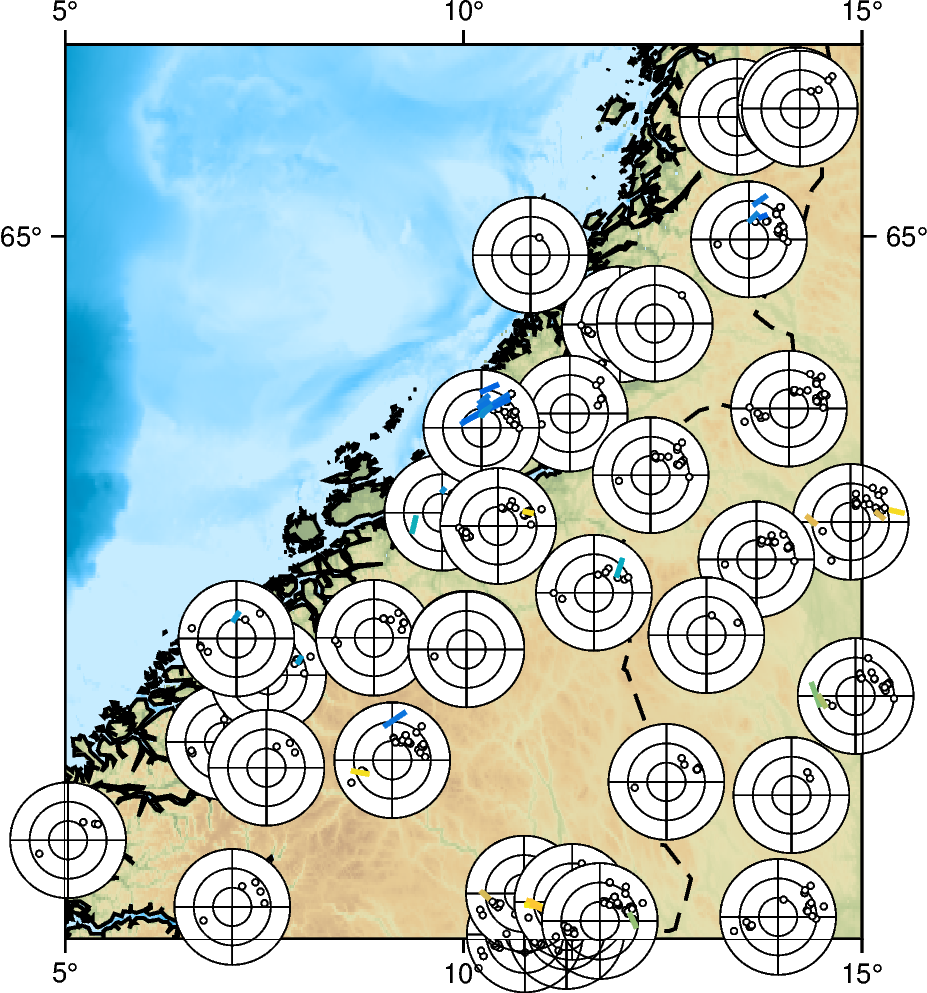

In [8]:
# insert the stereoplots available from eps files using the image function of PyGMT
sizeim = '0.12i'
diaCIRC = '0.115i'
diaSTAMARKER = '1.5p'

for i in range(0,len(datatab)):
    lon_im = datatab.lon[i]
    lat_im = datatab.lat[i]
    filen = datatab.filename[i]
    
    lonCIRC = datatab.lon[i]
    latCIRC = datatab.lat[i]

    fig.plot(x = lonCIRC, 
             y = latCIRC,
             style = 'c' + diaCIRC,
             color = 'white')
    
    fig.image('stereoplots_eps/' + filen, D = 'g' + str(lon_im) + '/' + str(lat_im) + '+w' + sizeim + '+jCM')

fig.show(dpi = figdpi)

In [9]:
# finally save figure
fig.savefig('PLOT_figs17.pdf')